# Matplotlib - gráficos 2D y 3D en Python

Versión original en inglés de [J.R. Johansson](http://jrjohansson.github.io/) (robert@riken.jp).

Traducido/Adaptado por [G.F. Rubilar](http://google.com/+GuillermoRubilar).

La última versión de estos [Notebooks](http://ipython.org/notebook.html) está disponible en [http://github.com/PythonUdec/CPC19](http://github.com/PythonUdec/CPC19).

La última versión del original (en inglés) está disponible en [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).
Los otros notebooks de esta serie están listados en [http://jrjohansson.github.com](http://jrjohansson.github.com).

In [138]:
%matplotlib inline 

(Lo anterior configura Matplotlib para que muestre figuras en el notebook, en lugar de en una ventana nueva. Más detalles abajo)

# Introducción

Matplotlib es una excelente librería gráfica 2D y 3D. Algunas de las muchas ventajas de esta librería son:

* Es fácil comenzar a crear gráficos.
* Incluye soporte para $\LaTeX$ en leyendas y textos.
* Mucho control de cada elemento de la figura, incluyendo el tamaño y la densidad de puntos (dpi). 
* Formatos de salida de alta calidad, incluyendo PNG, PDF, SVG, EPS.
* GUI para la exploración interactiva de figuras *y* soporte para la generación "headless" de archivos de figuras.

Una de las características claves de Matplotlib y que hace a esta librería **altamente adecuada para generar figuras para publicaciones científicas** es que todos los aspectos de la figura pueden ser controlados *programando*. Esto es importante para la reproducibilidad y conveniente cuando se necesita regenerar la figura con datos actualizados o cambios en su apariencia.

Más información en la página de Matplotlib: http://matplotlib.org/

# API tipo Matlab

Una forma sencilla para comenzar a graficar usando Matplotlib es usando la API ("Application Programming Interface") tipo Matlab que Matplotlib suministra, a través del módulo `matplotlib.pyplot`.

Esta API está diseñada para que sea compatible con las funciones para graficar de Matlab, de modo que resulta fácil para aquellos acostumbrados a usar este software.

Importamos entonces el (sub-)módulo `pyplot`: 

In [139]:
import matplotlib.pyplot as plt
#dir(plt)

### Ejemplo

Una figura simple usando la API tipo Matlab:

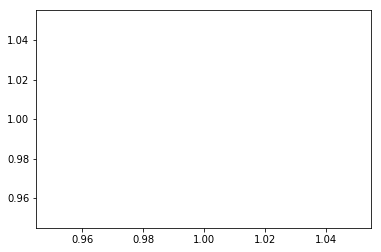

In [140]:
plt.plot(1,1)

Si bien el gráfico anterior se creó, el "punto" de coordenadas (1,1) se representa con un punto "invisible". Podemos cambiar el *marcador* usado con la opción `marker`:

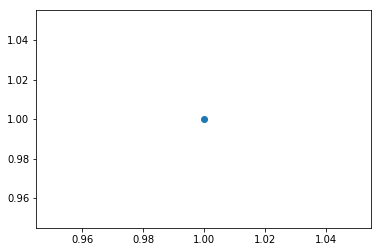

In [141]:
plt.plot(1,1, marker='o')

Podemos graficar más puntos en el mismo gráfico entrando la lista de las componentes horizontales y verticales. Por ejemplo, el código

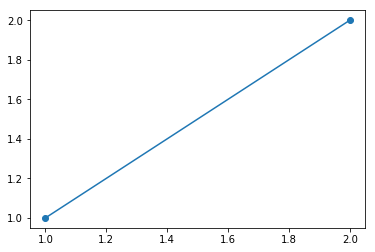

In [142]:
plt.plot([1,2],[1,2], marker='o')

grafica los puntos con coordenadas (1,1) y (2,2), usando el marcador indicado. Por defecto, `plot` une los puntos por una recta.

En general, podemos graficar muchos puntos simplemente indicando el arreglo de las coordenadas horizontales y verticales. En el siguiente ejemplo, se define un arreglo que divide el intervalo $x\in [0,5]$ en 50 elementos, y grafica los puntos correspondientes a la función cuadrática evaluada en cada punto:

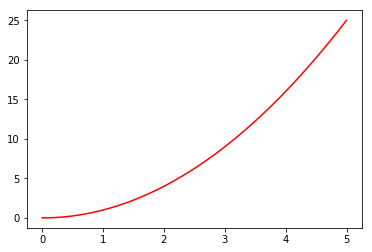

In [143]:
import numpy as np
x = np.linspace(0,5,50)
y = x**2
plt.plot(x,y,color='red')

Podemos agregar un título, etiquetas para los ejes, y una grilla, usando `title`, `xlim`, `ylim` y `grid`:

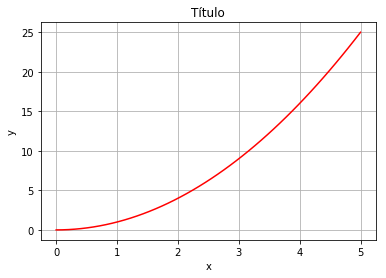

In [144]:
plt.plot(x,y,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title(u'Título') # el caracter `u` es necesario para incluir acentos en el texto
plt.grid()

Una de las características distintivas de Matplotlib, es que soporta comandos $\LaTeX$:

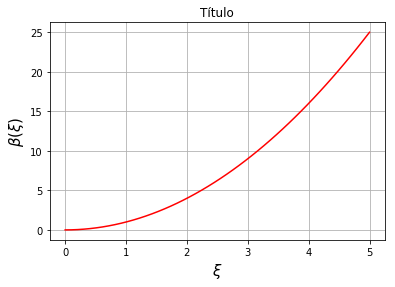

In [145]:
plt.plot(x,y,color='red')
plt.xlabel(r'$\xi$', fontsize=15)  # el caracter `r` ("raw") es necesario para asegurar que los comandos LaTeX sean reconocidos correctamente
plt.ylabel(r'$\beta(\xi)$', fontsize=15) # fontsize define el tamaño de los caracteres usados
plt.title(u'Título') # el caracter `u` es necesario para incluir acentos en el texto
plt.grid()

También podemos graficar más de un conjunto de datos en un mismo gráfico:

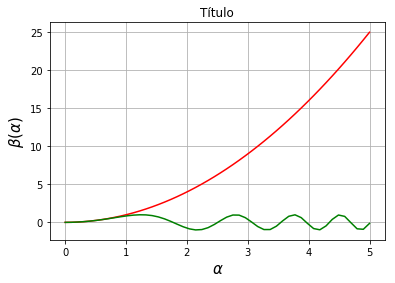

In [146]:
plt.plot(x,y,color='red')
plt.plot(x,np.sin(y),color='green')
plt.xlabel(r'$\alpha$', fontsize=15)  # el caracter `r` ("raw") es necesario para asegurar que los comandos LaTeX sean reconocidos correctamente
plt.ylabel(r'$\beta(\alpha)$', fontsize=15) # fontsize define el tamaño de los caracteres usados
plt.title(u'Título') # el caracter `u` es necesario para incluir acentos en el texto
plt.grid()

Las etiquetas de cada conjunto de puntos puede ser agregada usando `labels` y `legend`:

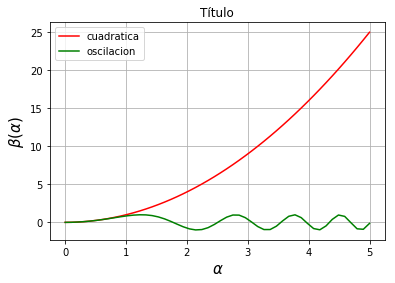

In [147]:
plt.plot(x,y,color='red', label='cuadratica')
plt.plot(x,np.sin(y),color='green', label='oscilacion')
plt.xlabel(r'$\alpha$', fontsize=15)  # el caracter `r` ("raw") es necesario para asegurar que los comandos LaTeX sean reconocidos correctamente
plt.ylabel(r'$\beta(\alpha)$', fontsize=15) # fontsize define el tamaño de los caracteres usados
plt.title(u'Título') # el caracter `u` es necesario para incluir acentos en el texto
plt.grid()
plt.legend()

La posición de las etiquetas puede ser controlado con la opción `loc` de `legend`:

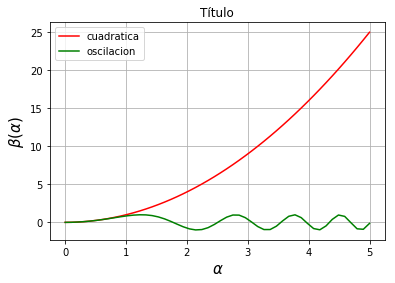

In [148]:
plt.plot(x,y,color='red', label='cuadratica')
plt.plot(x,np.sin(y),color='green', label='oscilacion')
plt.xlabel(r'$\alpha$', fontsize=15)  # el caracter `r` ("raw") es necesario para asegurar que los comandos LaTeX sean reconocidos correctamente
plt.ylabel(r'$\beta(\alpha)$', fontsize=15) # fontsize define el tamaño de los caracteres usados
plt.title(u'Título') # el caracter `u` es necesario para incluir acentos en el texto
plt.grid()
plt.legend(loc=2)

La mayoría de las funciones gráficas de Matlab están includas en el módulo `pyplot`. Por ejemplo, las funciones `subplot` y `color/symbol`:

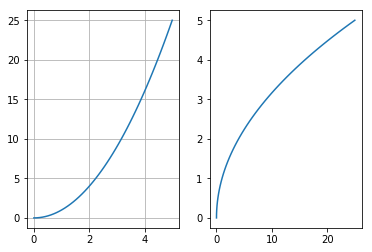

In [149]:
plt.subplot(1,2,1)
plt.plot(x, y)
plt.grid()
plt.subplot(1,2,2)
plt.plot(y, x)

Lo positivo de la API Pyplot es que es fácil comenzar, y que requiere un mínimo de código para producir gráficos simples. 

Sin embargo, esta API no es la más adecuada cuando se requiere producir gráficos complejos y/o se requiere controlar cada aspecto del gráfico. En este caso, es recomendable aprender y usar la API gráfica orientada al objeto de Matplotlib. Es muy poderosa y agradable de usar en caso de requerir figuras avanzadas, con sub-gráficos, objetos insertados y otros componentes. Más detalles abajo.

## Tamaño de la figura, proporción de los ejes y dpi

Matplotlib permite especificar la proporción de los ejes, la densidad de puntos (dpi) y el tamaño de la figura cuando el objeto `figure` es creado, usando los argumentos `figsize` y `dpi`. `figsize` es una tupla con el ancho y la altura de la figura en pulgadas, y `dpi` es el número de puntos (pixels) por pulgada.

Por ejemplo, para crear una figura de 800 por 400 pixels podemos usar:

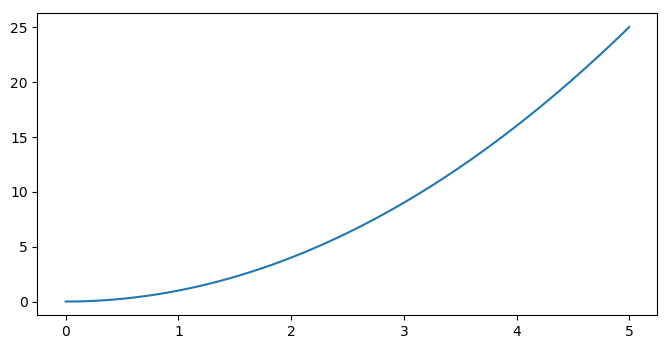

In [150]:
fig = plt.figure(figsize=(8,4), dpi=100)
plt.plot(x, y)

## Guardando figuras

Para guardar una figura en un archivo podemos usar `savefig`:

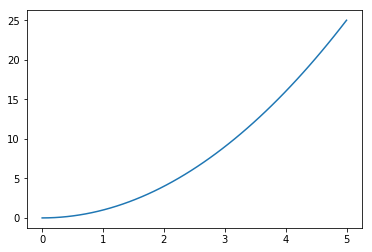

In [151]:
plt.plot(x,y)
plt.savefig("archivo.png")

Podemos, en forma opcional, especificar los dpi, además de elegir entre varios formatos.

In [152]:
fig.savefig("archivo.png", dpi=200)

In [153]:
fig.savefig("archivo.svg")

### ¿Qué formatos están disponibles y cuáles deberían ser usados para objener la mejor calidad?

Matplotlib puede crear gráficos de alta calidad en varios formatos, incluyendo PNG, JPG, EPS, SVG y PDF. Para publicaciones científicas, se recomienda usar PDF donde sea posible (y compilar documentos LaTeX con `pdflatex`, que puede incluir las figuras en PDF usando el comando `includegraphics`).

## Definiendo colores, anchos y tipos de línea

### Colores

En Matplotlib podemos definir los colores de las líneas y otros elementos gráficos de distintas maneras. Primero, podemos usar la sintaxis tipo MATLAB donde `'b'` significa azul (blue) `'g'` significa verde (green), etc. La API MATLAB para seleccionar tipos de línea también está disponible: por ejemplo 'b.-' significa línas con puntos azules.

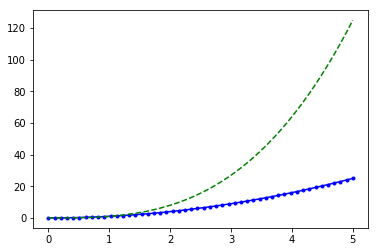

In [154]:
# Selección de color y estilo de línea tipo MATLAB
plt.plot(x, x**2, 'b.-') # línea con puntos azul
plt.plot(x, x**3, 'g--')
#plt.plot(x, x**4, color='r', marker='x') # línea con puntos azul
# línea a trazos verde

También podemos definir colores por su nombre o sus códigos RGB, y opcionalmente suministrar un valor alfa, usando los argumentos  `color` y `alpha` :

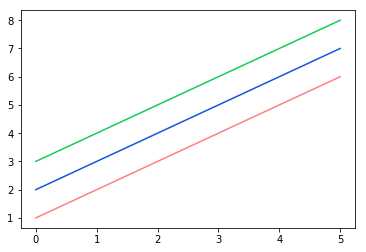

In [155]:
plt.plot(x, x+1, color="red", alpha=0.5) # rojo semi-transparente
plt.plot(x, x+2, color="#1155dd")        # código RGB para un color azulado
plt.plot(x, x+3, color="#15cc55")        # código RGB para un color verdoso

### Estilos de línea y marcadores

Para cambiar el ancho de una línea podemos usar el argumento `linewidth` o `lw`, y el estilo de línea puede ser seleccionando usando los argumentos `linestyle` o `ls`:

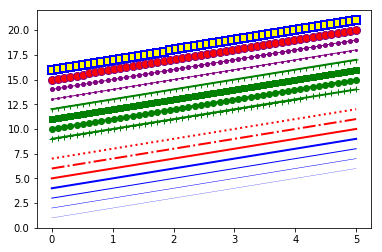

In [156]:
plt.plot(x, x+1, color="blue", linewidth=0.25)
plt.plot(x, x+2, color="blue", linewidth=0.50)
plt.plot(x, x+3, color="blue", linewidth=1.00)
plt.plot(x, x+4, color="blue", linewidth=2.00)

# posibles opciones de linestype: ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
plt.plot(x, x+5, color="red", lw=2, linestyle='-')
plt.plot(x, x+6, color="red", lw=2, ls='-.')
plt.plot(x, x+7, color="red", lw=2, ls=':')

# posibles símbolos de marcadores: '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
plt.plot(x, x+ 9, color="green", lw=2, ls='-', marker='+')
plt.plot(x, x+10, color="green", lw=2, ls='-', marker='o')
plt.plot(x, x+11, color="green", lw=2, ls='-', marker='s')
plt.plot(x, x+12, color="green", lw=2, ls='-', marker='1')

# Tamaño y color del marcador
plt.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
plt.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
plt.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
plt.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

## Controlando la apariencia de los ejes

La apariencia de los ejes es un aspecto importante de una figura que comúnmente se requiere modificar para confeccionar un gráfico con calidad de publicación. Necesitamos ser capaces de controlar dónde están ubicados los ticks y las etiquetas, modificar el tamaño de letra y posiblemente las etiquetas usadas en los ejes. En esta sección veremos cómo controlar estas propiedades en una figura de matplotlib.

### Rango de los ejes

Lo primero que quisieramos configurar es el rango de los ejes. Podemos hacer esto usando  `ylim` y `xlim`, o `axis('tight')` para obtener automáticamente rangos de ejes "apretados".

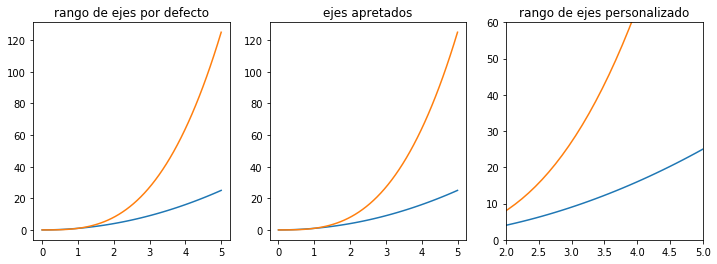

In [157]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(x, x**2)
plt.plot(x, x**3)
plt.title("rango de ejes por defecto")

plt.subplot(1, 3, 2)
plt.plot(x, x**2)
plt.plot(x, x**3)
plt.axis('tight')
plt.title("ejes apretados")

plt.subplot(1, 3, 3)
plt.plot(x, x**2)
plt.plot(x, x**3)
plt.ylim([0, 60])
plt.xlim([2, 5])
plt.title("rango de ejes personalizado");

### Posicionamiento de ticks y etiquetas de ticks personalizadas

Podemos determinar explícitamente dónde queremos que aparezcan los ticks de los ejes usando `xticks` y `yticks`, donde ambas funciones toman una lista de valores que determinan dónde se localizarán los ticks sobre el eje (en unidades de los datos), y una lista con los strings a incluir en cada tick. Podemos también usar las funciones `xticklabels` y `yticklabels` para ingresar una lista de etiquetas personalizadas para cada tick:

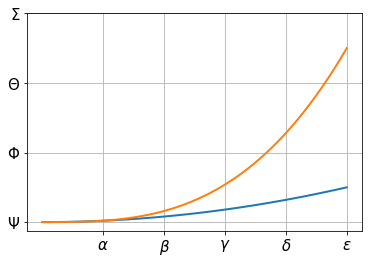

In [158]:
plt.plot(x, x**2, lw=2)
plt.plot(x, x**3, lw=2)
plt.xticks([1, 2, 3, 4, 5],[r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=15)
plt.yticks([0, 50, 100, 150],[r'$\Psi$', r'$\Phi$', r'$\Theta$', r'$\Sigma$'], fontsize=15)
plt.grid()

En Matplotlib existen muchos métodos más avanzados para controlar la ubicación de los ticks mayores y menores, como por ejemplo la ubicación automática de acuerdo a distintos criterios. Ver [http://matplotlib.org/api/ticker_api.html]([http://matplotlib.org/api/ticker_api.htm) para más detalles.

### Mallas de ejes

Como vimos, `grid` nos permite activar y desactivar las líneas de malla (grid). También podemos personalizar la apariencia de las líneas de malla, usando los mismos argumentos que usamos previamente con la función `plot`.

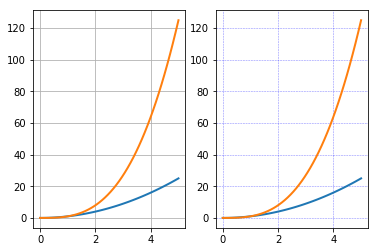

In [159]:
plt.subplot(1,2,1)
# apariencia por defecto de la malla
plt.plot(x, x**2, lw=2)
plt.plot(x, x**3, lw=2)
plt.grid(True)

plt.subplot(1,2,2)
# apariencia personalizada de la malla
plt.plot(x, x**2, lw=2)
plt.plot(x, x**3, lw=2)
plt.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

## Otros estilos de gráficos 2D

Además de la función `plot`, existen varias otras funciones para generar distintos tipos de gráficos. Ver la galería de Matplotlib para una lista completa de los tipos disponibles: [http://matplotlib.org/gallery.html](http://matplotlib.org/gallery.html). Algunos de los más útiles se muestran a continuación:

In [160]:
n = np.array([0,1,2,3,4,5])

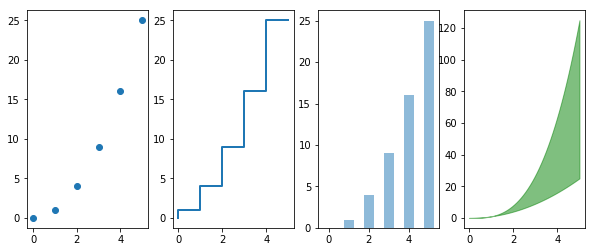

In [161]:
plt.figure(figsize=(10,4))
plt.subplot(1,4,1)
plt.scatter(n, n**2)
plt.subplot(1,4,2)
plt.step(n, n**2, lw=2)
plt.subplot(1,4,3)
plt.bar(n, n**2, align="center", width=0.5, alpha=0.5)
plt.subplot(1,4,4)
plt.fill_between(x, x**2, x**3, color="green", alpha=0.5);

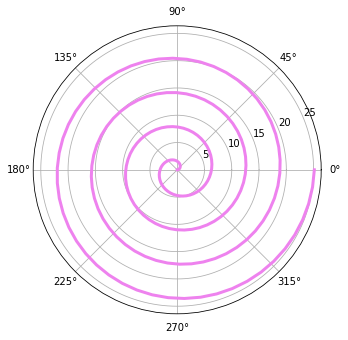

In [162]:
# Gráfico polar usando add_axes y proyección polar
plt.figure()
plt.axes([0, 0, 1, 1], polar=True)
t = np.linspace(0, 8*np.pi, 200)
plt.plot(t, t, color='violet', lw=3)

## Notas de texto

Se pueden incluir notas de texto en figuras de Matplotlib usando la función `text`. Tal como los textos en las etiquetas, leyendas, y títulos, incluye soporte para texto en formato LaTeX:

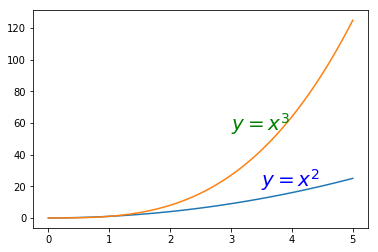

In [163]:
plt.plot(x, x**2)
plt.plot(x, x**3)

plt.text(3.5, 20, r"$y=x^2$", fontsize=20, color="blue")
plt.text(3, 55, r"$y=x^3$", fontsize=20, color="green");

## Mapas de colores y líneas de contorno

Los mapas de colores y las líneas de contorno son útles para graficar funciones de dos variables. En la mayoría de los casos usaremos un mapa de colores para codificar una dimensión de los datos. Existen varios mapas de colores predefinidos, y además definir mapas de colores personalizados es relativamente directo. Para ver una lista de los mapas de colores predefinidos, ver: 
[http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps](http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps).

In [164]:
alpha = 0.7
phi = 2*np.pi*0.5

def flux_qubit_potential(x,y):
    return 2 + alpha - 2 * np.cos(2*np.pi*x)*np.cos(2*np.pi*y) - alpha*np.cos(phi-2*x)

In [165]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X,Y = np.meshgrid(x, y)
Z = flux_qubit_potential(X, Y).T

### pcolor

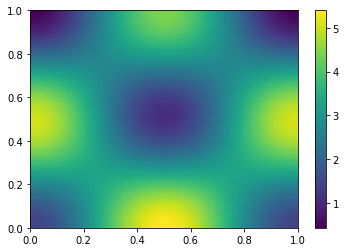

In [166]:
plt.pcolor(X, Y, Z)
plt.colorbar()

### imshow

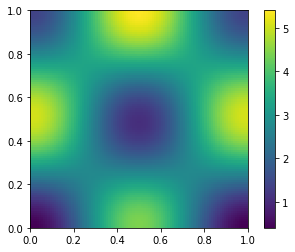

In [167]:
plt.imshow(Z, extent=[0, 1, 0, 1])
plt.colorbar()

### contour

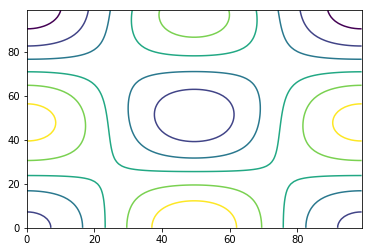

In [168]:
plt.contour(Z)

## Figuras 3D

Para producir gráficos 3D con Matplotlib, primero debemos crear una instancia de ejes de la clase `Axes3D`. Ejes 3D pueden ser agregados al marco de una figura de Matplotlib de la misma forma que para ejes 2D axes. Sin embargo, una forma conveniente para crear una instancia de eje 3D es usar el argumento `projection='3d'`en las funciones `add_axes` o `add_subplot`.

In [169]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


### Gráficos de superficies

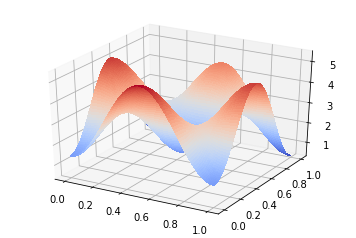

In [170]:
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

### Gráficos de mallas (Wire-frame)

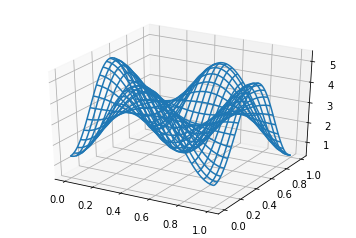

In [171]:
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

### Gráficos de contorno con proyecciones

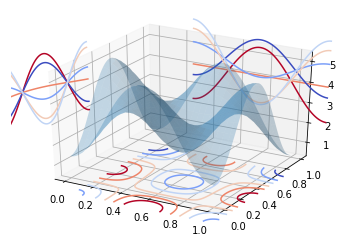

In [172]:
ax = plt.subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.contour(X, Y, Z, zdir='z', offset=-0.5, cmap=cm.coolwarm)
ax.contour(X, Y, Z, zdir='x', offset=-0.5, cmap=cm.coolwarm)
ax.contour(X, Y, Z, zdir='y', offset=1.5, cmap=cm.coolwarm)

### Cambiando el ángulo de visión:

Podemos cambiar la perspectiva en un gráfico 3D usando la función `view_init`, que toma dos argumentos: la elevación y el ángulo azimutal (en grados):

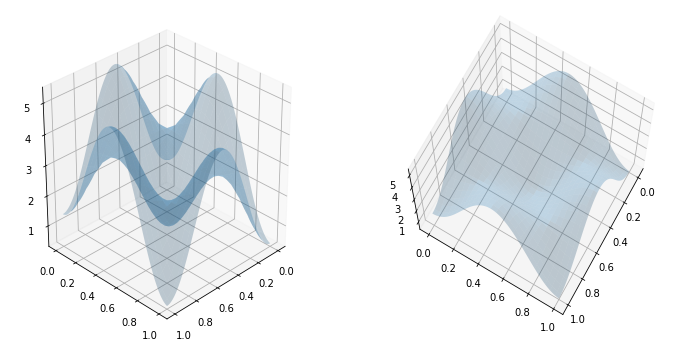

In [173]:
plt.figure(figsize=(12,6))

ax=plt.subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax=plt.subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

# La API orientada al objeto de Matplotlib

La idea principal de la programación orientada al objeto es que se tienen objetos sobre los cuales se pueden aplicar funciones y acciones, y que ningún estado de un objeto o programa debe ser global (como en pyplot). La ventaja de esta forma de trabajo se manifiesta cuando se requiere crear más de una figura, o cuando una figura contiene sub-figuras. 

Para usar la API orientada al objeto comenzamos similarmente al ejemplo anterior, pero en lugar de crear una instancia de figura global almacenamos una referencia a la figura recién creada en la variable `fig`, y a partir de ella creamos nuevos ejes `axes` usando el método `add_axes` en la instancia `fig` de la clase `Figure`.

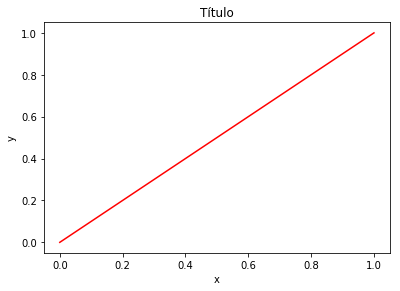

In [174]:
fig = plt.figure()

ejes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # izquierda, abajo, ancho, altura (rango 0 a 1)

ejes.plot(x,y, color = 'r')

ejes.set_xlabel('x')
ejes.set_ylabel('y')
ejes.set_title(u'Título');

Aunque se requiere algo más de código, la ventaja es que ahora tenemos control completo sobre dónde se ubican los ejes, y además podemos agregar fácilmente más de un eje a la figura.

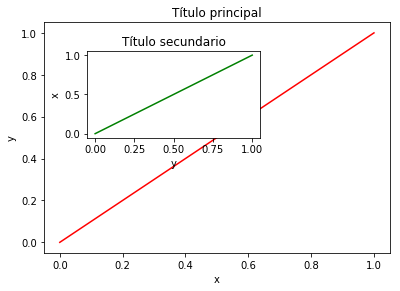

In [175]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # ejes principales
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # ejes del gráfico insertado

# figura principal
axes1.plot(x,y,'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title(u'Título principal')

# figura insertada
axes2.plot(y,x,'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title(u'Título secundario');

Si no nos importa ser explícitos sobre dónde estarán ubicados los ejes en el marco de nuestra figura, podemos usar uno de los muchos administradores de la distribución de los ejes que tiene Matplotlib. Un favorito es `subplots`, que puede ser usado de la forma siguiente:

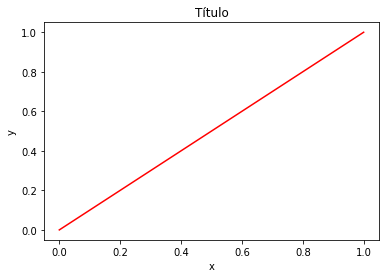

In [176]:
fig, axes = plt.subplots() # crea una nueva figura y un set de ejes

axes.plot(x,y,'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title(u'Título');

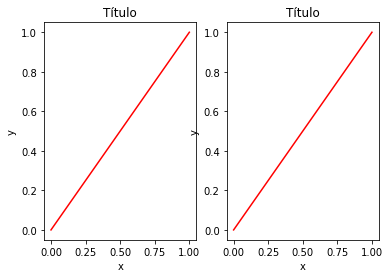

In [177]:
 # crea una figura, con dos set de ejes, almacenados en el array axes
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(u'Título');

Fácil, pero no tan bonito debido a la superposición de los ejes y etiquetas en la parte central, cierto?

Podemos mejorar esto usando el método `fig.tight_layout`, que ajusta automáticamente la posición de los ejes en el marco de la figura de modo que no exista contenido que se superponga:

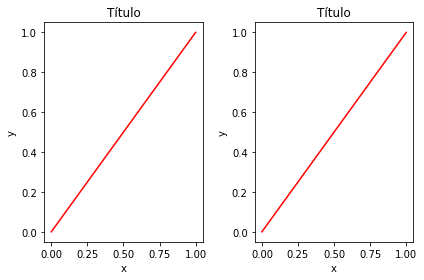

In [179]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(u'Título')
    
fig.tight_layout()

## Lectura adicional

* [http://www.matplotlib.org](http://www.matplotlib.org) - La página del proyecto Matplotlib.
* [https://github.com/matplotlib/matplotlib](https://github.com/matplotlib/matplotlib) - El código fuente de Matplotlib.
* [http://matplotlib.org/gallery.html](http://matplotlib.org/gallery.html) - Una gran galería que muestra los tipos de gráficos que Matplotlib puede crear. ¡Altamente recomendado!
* [http://www.loria.fr/~rougier/teaching/matplotlib/](http://www.loria.fr/~rougier/teaching/matplotlib/) - Un buen tutorial de Matplotlib.